# Hypothesis test examples

### The vote for the Civil Rights Act in 1964

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True]*136 + [False]*35)

In [13]:
def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

In [14]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

In [15]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    for i in range(size):
      perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
      perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

In [18]:
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, size=10000)

In [19]:
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0001


### A time-on-website analog

In [20]:
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

In [26]:
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [27]:
def diff_of_means(data_1, data_2):
  """Difference in means of two arrays."""
  return np.mean(data_1) - np.mean(data_2)

In [28]:
nht_diff_obs = diff_of_means(nht_dead, nht_live)

In [29]:
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size=10000)

In [30]:
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0001


### Hypothesis test on Pearson correlation

In [31]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

In [34]:
df = pd.read_csv('female_literacy_fertility.csv')

In [35]:
df['illiteracy'] = 100 - df['female literacy']
illiteracy = df['illiteracy'].values
fertility = df['fertility'].values

In [37]:
r_obs = pearson_r(illiteracy, fertility)

In [39]:
perm_replicates = np.empty(10000)

In [40]:
for i in range(10000):
    illiteracy_permuted = np.random.permutation(illiteracy)
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

In [42]:
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val=', p)

p-val= 0.0


### Do neonicotinoid insecticides have unintended consequences?

In [43]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [44]:
control = np.array([  4.159234,   4.408002,   0.172812,   3.498278,   3.104912,
         5.164174,   6.615262,   4.633066,   0.170408,   2.65    ,
         0.0875  ,   1.997148,   6.92668 ,   4.574932,   3.896466,
         5.209814,   3.70625 ,   0.      ,   4.62545 ,   3.01444 ,
         0.732652,   0.4     ,   6.518382,   5.225   ,   6.218742,
         6.840358,   1.211308,   0.368252,   3.59937 ,   4.212158,
         6.052364,   2.115532,   6.60413 ,   5.26074 ,   6.05695 ,
         6.481172,   3.171522,   3.057228,   0.218808,   5.215112,
         4.465168,   2.28909 ,   3.732572,   2.17087 ,   1.834326,
         6.074862,   5.841978,   8.524892,   4.698492,   2.965624,
         2.324206,   3.409412,   4.830726,   0.1     ,   0.      ,
         4.101432,   3.478162,   1.009688,   4.999296,   4.32196 ,
         0.299592,   3.606032,   7.54026 ,   4.284024,   0.057494,
         6.036668,   2.924084,   4.150144,   1.256926,   4.666502,
         4.806594,   2.52478 ,   2.027654,   2.52283 ,   4.735598,
         2.033236,   0.      ,   6.177294,   2.601834,   3.544408,
         3.6045  ,   5.520346,   4.80698 ,   3.002478,   3.559816,
         7.075844,  10.      ,   0.139772,   6.17171 ,   3.201232,
         8.459546,   0.17857 ,   7.088276,   5.496662,   5.415086,
         1.932282,   3.02838 ,   7.47996 ,   1.86259 ,   7.838498,
         2.242718,   3.292958,   6.363644,   4.386898,   8.47533 ,
         4.156304,   1.463956,   4.533628,   5.573922,   1.29454 ,
         7.547504,   3.92466 ,   5.820258,   4.118522,   4.125   ,
         2.286698,   0.591882,   1.273124,   0.      ,   0.      ,
         0.      ,  12.22502 ,   7.601604,   5.56798 ,   1.679914,
         8.77096 ,   5.823942,   0.258374,   0.      ,   5.899236,
         5.486354,   2.053148,   3.25541 ,   2.72564 ,   3.364066,
         2.43427 ,   5.282548,   3.963666,   0.24851 ,   0.347916,
         4.046862,   5.461436,   4.066104,   0.      ,   0.065   ])

In [45]:
treated = np.array([ 1.342686,  1.058476,  3.793784,  0.40428 ,  4.528388,  2.142966,
        3.937742,  0.1375  ,  6.919164,  0.      ,  3.597812,  5.196538,
        2.78955 ,  2.3229  ,  1.090636,  5.323916,  1.021618,  0.931836,
        2.78    ,  0.412202,  1.180934,  2.8674  ,  0.      ,  0.064354,
        3.008348,  0.876634,  0.      ,  4.971712,  7.280658,  4.79732 ,
        2.084956,  3.251514,  1.9405  ,  1.566192,  0.58894 ,  5.219658,
        0.977976,  3.124584,  1.297564,  1.433328,  4.24337 ,  0.880964,
        2.376566,  3.763658,  1.918426,  3.74    ,  3.841726,  4.69964 ,
        4.386876,  0.      ,  1.127432,  1.845452,  0.690314,  4.185602,
        2.284732,  7.237594,  2.185148,  2.799124,  3.43218 ,  0.63354 ,
        1.142496,  0.586   ,  2.372858,  1.80032 ,  3.329306,  4.028804,
        3.474156,  7.508752,  2.032824,  1.336556,  1.906496,  1.396046,
        2.488104,  4.759114,  1.07853 ,  3.19927 ,  3.814252,  4.275962,
        2.817056,  0.552198,  3.27194 ,  5.11525 ,  2.064628,  0.      ,
        3.34101 ,  6.177322,  0.      ,  3.66415 ,  2.352582,  1.531696])

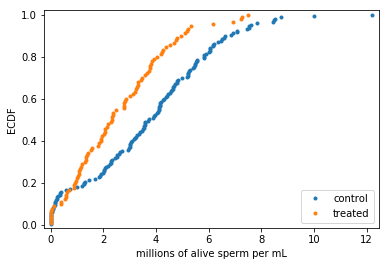

In [48]:
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

plt.margins(0.02)

plt.legend(('control', 'treated'), loc='lower right')

plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

### Bootstrap hypothesis test on bee sperm counts

In [49]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    return func(np.random.choice(data, size=len(data)))

In [50]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [51]:
diff_means = np.mean(control) - np.mean(treated)

In [52]:
mean_count = np.mean(np.concatenate((control, treated)))

In [53]:
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

In [54]:
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

In [55]:
bs_replicates = bs_reps_control - bs_reps_treated

In [56]:
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0
